In [1]:
pip install networkx gensim


In [30]:
import networkx as nx
from gensim.models import Word2Vec
import random

In [31]:
def initialize_embeddings(graph, embedding_dim):
    num_nodes = len(graph.nodes())
    return np.random.uniform(-1, 1, (num_nodes, embedding_dim))

def generate_random_walk(graph, start_node, walk_length):
    walk = [start_node]
    current_node = start_node
    for _ in range(walk_length-1):
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)
        walk.append(current_node)
    return [str(node) for node in walk]

In [32]:
def deepwalk(graph, window_size, embedding_dim, walks_per_vertex, walk_length):
    # Step 1: Initialization
    embeddings = initialize_embeddings(graph, embedding_dim)

    all_walks = []
    nodes = list(graph.nodes())

    # Step 3: Walks Generation
    for _ in range(walks_per_vertex):
        random.shuffle(nodes)  # Step 4: Shuffle nodes
        for node in nodes:
            walk = generate_random_walk(graph, node, walk_length)
            all_walks.append(walk)

    # Step 7: SkipGram
    model = Word2Vec(all_walks, vector_size=embedding_dim, window=window_size, min_count=0, sg=1, workers=4)

    # Update embeddings
    for idx, node in enumerate(graph.nodes()):
        node_str = str(node)
        if node_str in model.wv:
            embeddings[idx] = model.wv[node_str]
        else:
            print(f"Embedding for node {node_str} not found. Using initialized values.")

    return embeddings


In [33]:
G = nx.karate_club_graph()
embeddings = deepwalk(G, window_size=5, embedding_dim=3, walks_per_vertex=10, walk_length=5)
print(embeddings[1])  # Embedding for node 0

[-0.1511095   0.20465253 -0.12095059]


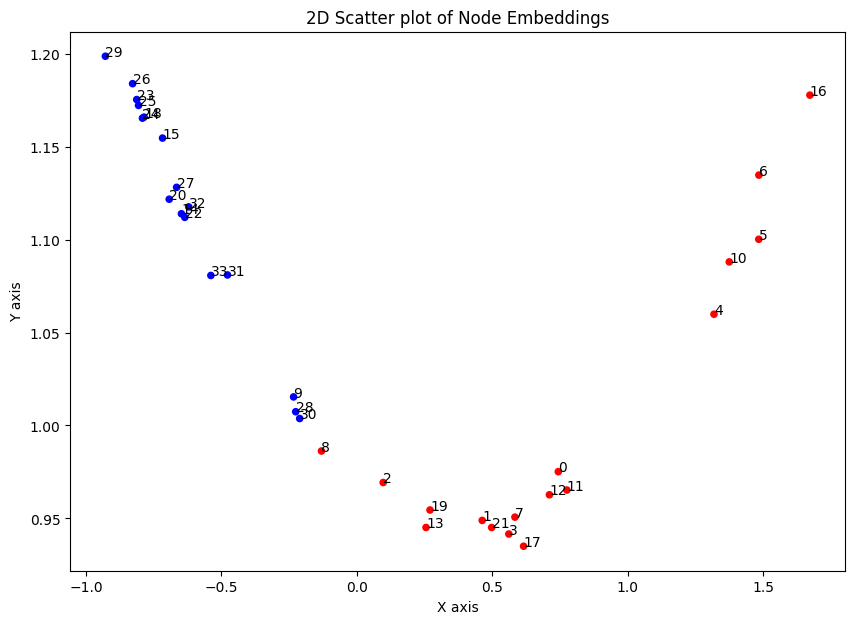

In [37]:
import matplotlib.pyplot as plt

embeddings = deepwalk(G, window_size=10, embedding_dim=2, walks_per_vertex=100, walk_length=20)

# Get the club affiliation for each node
clubs = nx.get_node_attributes(G, 'club')
colors = ['r' if clubs[node] == 'Mr. Hi' else 'b' for node in G.nodes()]

# Extract x, y, z coordinates of the embeddings
x = embeddings[:, 0]
y = embeddings[:, 1]


# Plotting
fig, ax = fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y, c=colors, s=20)

# Label the points with node numbers
for i, node in enumerate(G.nodes()):
    ax.text(x[i], y[i], str(node))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('2D Scatter plot of Node Embeddings')
plt.show()

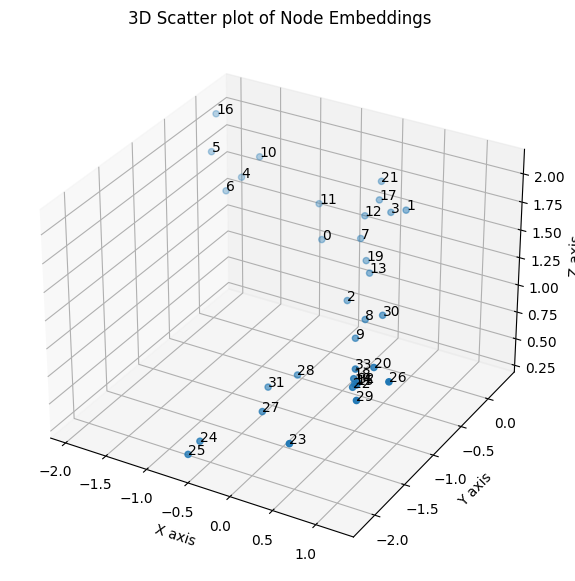

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Generate embeddings of dimension 3
embeddings = deepwalk(G, window_size=5, embedding_dim=3, walks_per_vertex=100, walk_length=10)

# Extract x, y, z coordinates of the embeddings
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

# Label the points with node numbers
for i, node in enumerate(G.nodes()):
    ax.text(x[i], y[i], z[i], str(node))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter plot of Node Embeddings')
plt.show()

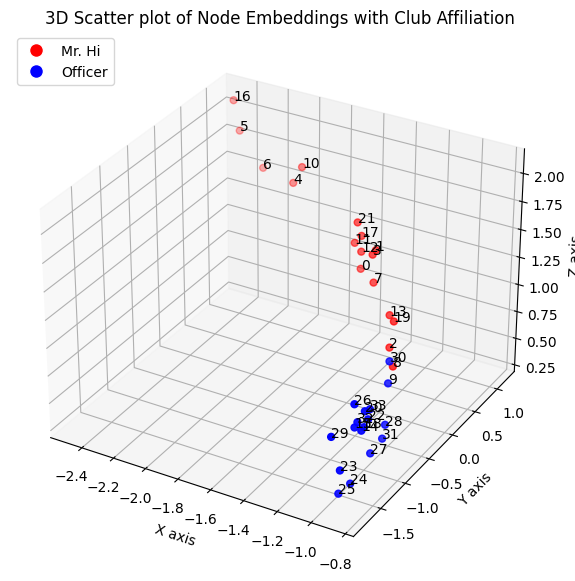

In [29]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=colors, s=25)  # 'c=colors' assigns color based on club

# Label the points with node numbers
for i, node in enumerate(G.nodes()):
    ax.text(x[i], y[i], z[i], str(node))

# Adding legend to denote club colors
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Mr. Hi', markersize=10, markerfacecolor='r'),
                   plt.Line2D([0], [0], marker='o', color='w', label='Officer', markersize=10, markerfacecolor='b')],
          loc='upper left')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter plot of Node Embeddings with Club Affiliation')
plt.show()
